## Step 1

In [48]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

from keras.utils import np_utils
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd

In [49]:
def curve_plot(mod):
    plt.subplot(2,1,1)
    plt.plot(mod.history['accuracy'])
    plt.plot(mod.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')

    plt.subplot(2,1,2)
    plt.plot(mod.history['loss'])
    plt.plot(mod.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

In [50]:
hello = tf.constant("Hello, TensorFlow")
print(hello)

tf.Tensor(b'Hello, TensorFlow', shape=(), dtype=string)


The tf.constant function creates a constant tensor. A tensor being a multidimensional array the constant function would create an array of specific shape that cannot be changed after creation.

## Step 2

#### Q1- Use same method that explain in lecture to show first 6 elements of the dataset.

In [51]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

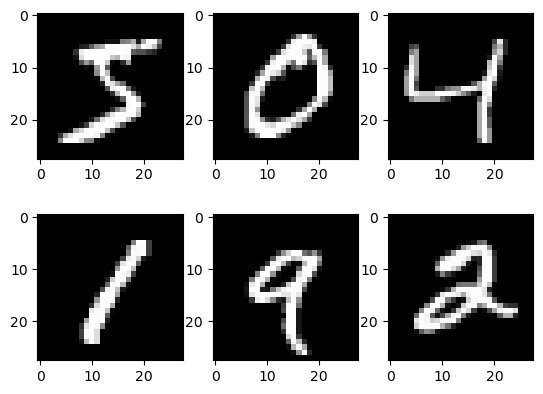

In [52]:
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    
# show the plot
plt.show()

#### Q2- Normalize the data by dividing the values by 255.

In [53]:
X_train = X_train / 255
X_test = X_test / 255

In [54]:
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='sigmoid'),
    Dense(10)
])

In [55]:
predictions = model(X_train[:1]).numpy()
predictions

array([[-0.32206285, -0.9600277 ,  0.21136229,  0.6207817 , -0.1166181 ,
         0.08684295, -0.46063372, -0.44102666, -0.7541313 ,  0.3356623 ]],
      dtype=float32)

In [56]:
tf.nn.sigmoid(predictions).numpy()

array([[0.4201731 , 0.27687266, 0.5526447 , 0.6503963 , 0.47087848,
        0.5216971 , 0.38683552, 0.39149636, 0.3199218 , 0.58313644]],
      dtype=float32)

In [57]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(Y_train[:1], predictions).numpy()

2.146121

In [58]:
model.compile(optimizer='SGD',
              loss=loss_fn,
              metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=5, verbose=0)

In [59]:
scores_1 = model.evaluate(X_test, Y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores_1[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores_1[1]*100))

313/313 - 1s - loss: 0.3724 - accuracy: 0.9011
Baseline Error: 9.89%
Baseline Accuracy: 90.11%


#### Q3- Add another layer with 128 nodes, increase the epochs to 10 and report the result. How much is the accuracy? (model.evaluate can tell you the accuracy).

In [60]:
model.add(Dense(128, activation="sigmoid"))
model.compile(optimizer='SGD',
               loss=loss_fn,
               metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=10, verbose=0)


In [61]:
scores_2 = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2620 - accuracy: 0.9237


In [62]:
print("Baseline Error: %.2f%%" % (100-scores_2[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores_2[1]*100))

Baseline Error: 7.63%
Baseline Accuracy: 92.37%


By increasing the epochs and adding the second hidden layer to the model we have a decrease in model accuracy and an increase in the model error.

In [63]:
hist = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, verbose=0)
hist_score = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2174 - accuracy: 0.9364


In [85]:
print("Baseline Accuracy: %.2f%%" % (hist_score[1]*100))

Baseline Accuracy: 93.64%


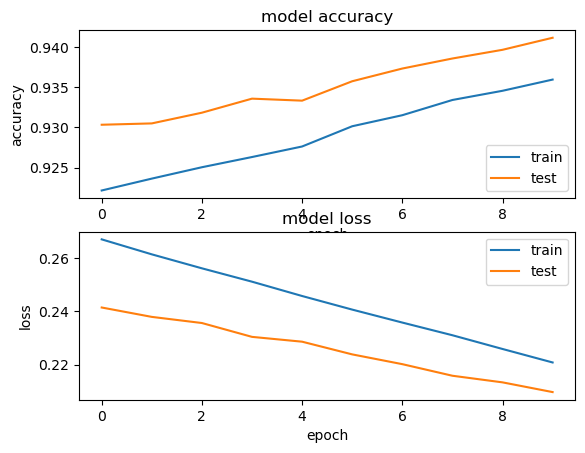

In [65]:
curve_plot(hist)

The hist model has an increased accuracy but the model does suffer from underfitting on the data. Increasing the epochs, changing the optimizer or using a larger dataset may create a better fitting model.

### Q4- Now train the model again with adding stochastic gradient descent with batch size of 200. What do you expect to be changed? Speed or accuracy?

In [66]:
new_hist = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=200, verbose=0)

In [67]:
new_hist_scores = model.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2089 - accuracy: 0.9400


In [84]:
print("Baseline Accuracy: %.2f%%" % (new_hist_scores[1]*100))

Baseline Accuracy: 94.00%


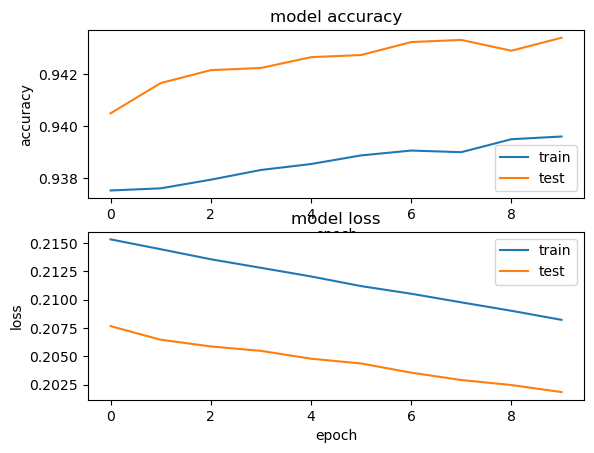

In [69]:
curve_plot(new_hist)

The new_hist model had a slight improved accuracy than the hist model. The model loss also had a lowered value but the speed rate did not change much. The new_hist model also sufffers from underfitting.

## Step 3 - Pima Diabetes Dataset

In [70]:
file = './pima-indians-diabetes.csv'
dataframe = pd.read_csv(file)
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
Y = dataframe["Outcome"]
X = dataframe.drop(['Outcome'], axis=1)

In [73]:
XD_train, XD_test, yD_train, yD_test = train_test_split(X, Y, test_size=0.20, random_state=1234)

In [74]:
# Normalize the training and testing X data; Reshape if needed
XD_train = np_utils.normalize(XD_train)
XD_test= np_utils.normalize(XD_test)

### Q5- Design a neural network with 2 hidden layers (hidden layer 1 with 12 nodes and hidden layer 2 with 8 nodes), report the accuracy and draw the learning curves. Apply a dropout to see if you could get any better result. Use ‘adam’ as optimizer.

In [75]:
db_model = Sequential([
    Flatten(input_shape=(8,)),
    Dense(12, activation="sigmoid"),
    Dense(8, activation="sigmoid"),
    Dense(2)
])
db_model.compile(optimizer='sgd', loss=loss_fn, metrics=["accuracy"])

In [76]:
diabetes_1 = db_model.fit(x = XD_train, y = yD_train, validation_data=(XD_test, yD_test), epochs=20, verbose=0)

In [77]:
db_1 = db_model.evaluate(XD_test, yD_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.6429


In [78]:
print("Diabetes SGD Baseline Model Accuracy: %.2f%%" % (db_1[1]*100))

Diabetes SGD Baseline Model Accuracy: 64.29%


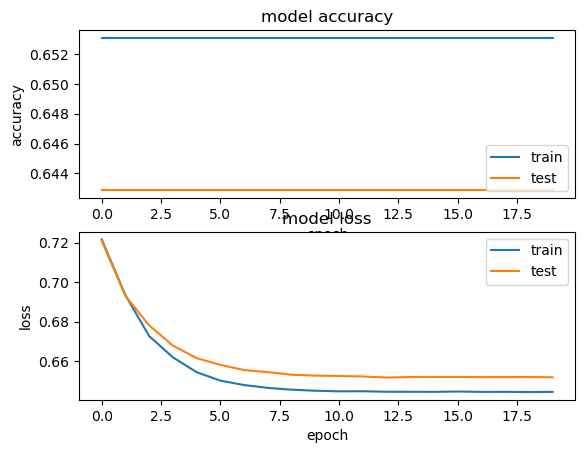

In [79]:
curve_plot(diabetes_1)

In [80]:
db_model.add(Dropout(0.2))
db_model.compile(optimizer='adam', loss=loss_fn, metrics=["accuracy"])

diabetes_2 = db_model.fit(XD_train, yD_train, validation_data=(XD_test, yD_test), epochs=20, verbose=0)

In [81]:
db_2 = db_model.evaluate(XD_test, yD_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6429


In [82]:
print("Diabetes ADAM Baseline Model Accuracy: %.2f%%" % (db_2[1]*100))

Diabetes ADAM Baseline Model Accuracy: 64.29%


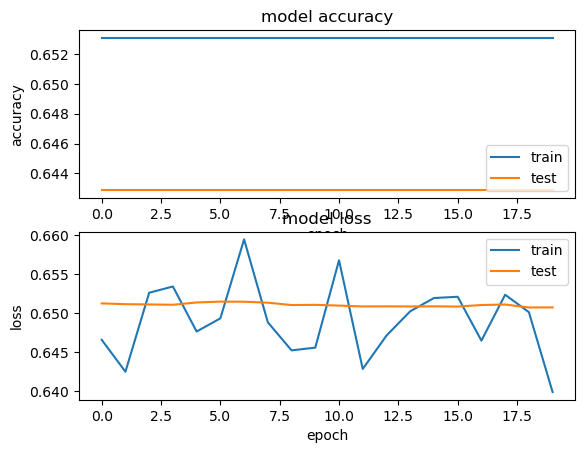

In [83]:
curve_plot(diabetes_2)

Two models were created for the Pima Diabetes dataset. The first model (db_1) used a SGD optimizer and produced a moderate accuracy and had an overall good fit for the dataset based on the training curve on the model loss graph. The second model (db_2) used an ADAM optimizer and also produced a moderate accuracy but did not have a good model fit. The db_2 training model curve on the model loss graph had several peaks and vallyes. This could indicate that the dataset does not work well with the ADAM optimizer and struggled to learn from it. This is also supported by the model accuracy graph where the training model's accuracy curve ran parallel to the test model curve. Overall, db_2 may be suffering from underfitting from the amount or type of data.